In [1]:
%matplotlib inline

In [2]:
import nltk

In [3]:
grammar = r"""
  NP: {<DT|JJ|NN.*>+}          # Chunk sequences of DT, JJ, NN
  PP: {<IN><NP>}               # Chunk prepositions followed by NP
  VP: {<VB.*><NP|PP|CLAUSE>+$} # Chunk verbs and their arguments
  CLAUSE: {<NP><VP>}           # Chunk NP, VP
  """
cp = nltk.RegexpParser(grammar)
sentence = [("Mary", "NN"), ("saw", "VBD"), ("the", "DT"), ("cat", "NN"),
    ("sit", "VB"), ("on", "IN"), ("the", "DT"), ("mat", "NN")]

In [4]:
print(cp.parse(sentence))
# (S
#   (NP Mary/NN)
#   saw/VBD
#   (CLAUSE
#     (NP the/DT cat/NN)
#     (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))

(S
  (NP Mary/NN)
  saw/VBD
  (CLAUSE
    (NP the/DT cat/NN)
    (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))


In [5]:
sentence = [("John", "NNP"), ("thinks", "VBZ"), ("Mary", "NN"),
    ("saw", "VBD"), ("the", "DT"), ("cat", "NN"), ("sit", "VB"),
    ("on", "IN"), ("the", "DT"), ("mat", "NN")]

In [6]:
print(cp.parse(sentence))
# (S
#   (NP John/NNP)
#   thinks/VBZ
#   (NP Mary/NN)
#   saw/VBD # [_saw-vbd]
#   (CLAUSE
#     (NP the/DT cat/NN)
#     (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))

(S
  (NP John/NNP)
  thinks/VBZ
  (NP Mary/NN)
  saw/VBD
  (CLAUSE
    (NP the/DT cat/NN)
    (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))


In [7]:
cp = nltk.RegexpParser(grammar, loop=2)

In [8]:
print(cp.parse(sentence))
# (S
#   (NP John/NNP)
#   thinks/VBZ
#   (CLAUSE
#     (NP Mary/NN)
#     (VP
#       saw/VBD
#       (CLAUSE
#         (NP the/DT cat/NN)
#         (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))))

(S
  (NP John/NNP)
  thinks/VBZ
  (CLAUSE
    (NP Mary/NN)
    (VP
      saw/VBD
      (CLAUSE
        (NP the/DT cat/NN)
        (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))))


In [9]:
tree1 = nltk.Tree('NP', ['Alice'])

In [10]:
print(tree1)
# (NP Alice)

(NP Alice)


In [11]:
tree2 = nltk.Tree('NP', ['the', 'rabbit'])

In [12]:
print(tree2)
# (NP the rabbit)

(NP the rabbit)


In [13]:
tree3 = nltk.Tree('VP', ['chased', tree2])

In [14]:
tree4 = nltk.Tree('S', [tree1, tree3])

In [15]:
print(tree4)
# (S (NP Alice) (VP chased (NP the rabbit)))

(S (NP Alice) (VP chased (NP the rabbit)))


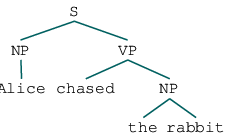

In [16]:
tree4

In [17]:
print(tree4[1])
# (VP chased (NP the rabbit))

(VP chased (NP the rabbit))


In [18]:
tree4[1].label()
# 'VP'

'VP'

In [19]:
tree4.leaves()
# ['Alice', 'chased', 'the', 'rabbit']

['Alice', 'chased', 'the', 'rabbit']

In [20]:
tree4[1][1][1]
# 'rabbit'

'rabbit'

In [21]:
tree3.draw()

In [22]:
def traverse(t):
    try:
        t.label()
    except AttributeError:
        print(t, end=" ")
    else:
        # Now we know that t.node is defined
        print('(', t.label(), end=" ")
        for child in t:
            traverse(child)
        print(')', end=" ")

In [23]:
t = nltk.Tree('(S (NP Alice) (VP chased (NP the rabbit)))')

TypeError: Tree: Expected a node value and child list 

In [ ]:
traverse(t)
# ( S ( NP Alice ) ( VP chased ( NP the rabbit ) ) )

In [24]:
traverse(tree4)

( S ( NP Alice ) ( VP chased ( NP the rabbit ) ) ) 